In [3]:
import mdtraj as md
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import math
from numpy import log2, zeros, mean, var, sum, loadtxt, arange, \
                  array, cumsum, dot, transpose, diagonal, floor
from numpy.linalg import inv, lstsq

https://figshare.com/articles/dataset/Microsecond_molecular_dynamics_simulation_of_kinase_domain_of_the_human_tyrosine_kinase_ABL1/4496795/1

This is a one microsecond trajectory of the catalytic domain of the human tyrosine protein kinase ABL1 (UNIPROT:ABL1_HUMAN, residues 242-493). The simulation was generated on Folding@home using OpenMM 6.3.1 with the AMBER99SB-ILDN forcefield, TIP3P water, and neutralizing salt. A Langevin integrator with 2 fs timestep, 300 K temperature, and 1/ps collision rate was used. PME with a nonbonded cutoff of 1.0 nm was used with default tolerance of 5.0e-4. A long-range isotropic dispersion correction was used to correct for the truncation of Lennard-Jones interactions at 1.0 nm. A molecular-scaling Monte Carlo barostat was applied using a 1 atm reference pressure, with MC moves attempted every 50 steps. Coordinates were saved every 250ps, and waters and ions stripped. The trajectory file contains 4000 snapshots. Initial models were generated with Ensembler (see References) using the ABL1 structure from chain B of PDB ID: 2GQG as a template.

https://www.rcsb.org/structure/2GQG

Trajetories and pdb can be downloaded here:
https://www.dropbox.com/s/qymy39ak2apqd75/ABL1.zip?dl=0


In [4]:
pdb='./ABL1/ABL1.pdb'
trajectory='./ABL1/ABL1.dcd'
outdir='./output/'
if not os.path.exists('outdir'):
    os.makedirs('outdir')
    
print("outdir:",outdir)
print("pdb:",pdb)
print("trjaectory:",trajectory)

outdir: ./output/
pdb: ./ABL1/ABL1.pdb
trjaectory: ./ABL1/ABL1.dcd


In [5]:
trj = md.load(trajectory, top=pdb,stride=1)
trj.center_coordinates()
top = trj.topology
first_frame = 0
last_frame = trj.n_frames
n_frames=trj.n_frames

In [6]:
nres=[]
for res in trj.topology.residues: nres.append(res.resSeq)
sequence=(' %s' % [residue for residue in trj.topology.residues])
resname=(' %s' % [residue.name for residue in trj.topology.residues])
resindex=(' %s' % [residue.index for residue in trj.topology.residues])
res_num=(' %s' % [residue.resSeq  for residue in trj.topology.residues])



#log = open("/Users/paulrobustelli/Desktop/Sa_calc.log", "w")
print("** SYSTEM INFO **\n")
print("Number of atoms: %d\n" % trj.n_atoms)
print("Number of residues: %d\n" % len(set(nres)))
print("Number of frames: %d\n" % trj.n_frames)
print("Starting frame: %d\n" % first_frame)
print("Last frame: %d\n" % last_frame)
print("sequence: %s\n" % sequence)
print("residue names: %s\n" % resname)
print("residue number: %s\n" % res_num)
print("residue index: %s\n" % resindex)


** SYSTEM INFO **

Number of atoms: 4062

Number of residues: 252

Number of frames: 4000

Starting frame: 0

Last frame: 4000

sequence:  [ILE242, THR243, MET244, LYS245, HIS246, LYS247, LEU248, GLY249, GLY250, GLY251, GLN252, TYR253, GLY254, GLU255, VAL256, TYR257, GLU258, GLY259, VAL260, TRP261, LYS262, LYS263, TYR264, SER265, LEU266, THR267, VAL268, ALA269, VAL270, LYS271, THR272, LEU273, LYS274, GLU275, ASP276, THR277, MET278, GLU279, VAL280, GLU281, GLU282, PHE283, LEU284, LYS285, GLU286, ALA287, ALA288, VAL289, MET290, LYS291, GLU292, ILE293, LYS294, HIS295, PRO296, ASN297, LEU298, VAL299, GLN300, LEU301, LEU302, GLY303, VAL304, CYS305, THR306, ARG307, GLU308, PRO309, PRO310, PHE311, TYR312, ILE313, ILE314, THR315, GLU316, PHE317, MET318, THR319, TYR320, GLY321, ASN322, LEU323, LEU324, ASP325, TYR326, LEU327, ARG328, GLU329, CYS330, ASN331, ARG332, GLN333, GLU334, VAL335, ASN336, ALA337, VAL338, VAL339, LEU340, LEU341, TYR342, MET343, ALA344, THR345, GLN346, ILE347, SER348, SER3

In [7]:
residue_num=[]
for res in top.residues: 
    residue_num.append(res.resSeq)
residue_id=np.asarray(residue_num)
residue_id
#do this so that you can use this as the x-axis for plots
print(residue_id)

[242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259
 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 277
 278 279 280 281 282 283 284 285 286 287 288 289 290 291 292 293 294 295
 296 297 298 299 300 301 302 303 304 305 306 307 308 309 310 311 312 313
 314 315 316 317 318 319 320 321 322 323 324 325 326 327 328 329 330 331
 332 333 334 335 336 337 338 339 340 341 342 343 344 345 346 347 348 349
 350 351 352 353 354 355 356 357 358 359 360 361 362 363 364 365 366 367
 368 369 370 371 372 373 374 375 376 377 378 379 380 381 382 383 384 385
 386 387 388 389 390 391 392 393 394 395 396 397 398 399 400 401 402 403
 404 405 406 407 408 409 410 411 412 413 414 415 416 417 418 419 420 421
 422 423 424 425 426 427 428 429 430 431 432 433 434 435 436 437 438 439
 440 441 442 443 444 445 446 447 448 449 450 451 452 453 454 455 456 457
 458 459 460 461 462 463 464 465 466 467 468 469 470 471 472 473 474 475
 476 477 478 479 480 481 482 483 484 485 486 487 48

In [8]:
#Use DSSP to calculate the secondary structure definition
#https://mdtraj.org/1.9.4/api/generated/mdtraj.compute_dssp.html
dssp=md.compute_dssp(trj,simplified=True)
dssp

array([['C', 'E', 'E', ..., 'C', 'C', 'C'],
       ['C', 'E', 'E', ..., 'H', 'C', 'C'],
       ['C', 'E', 'E', ..., 'C', 'C', 'C'],
       ...,
       ['C', 'E', 'E', ..., 'C', 'C', 'C'],
       ['C', 'E', 'E', ..., 'C', 'C', 'C'],
       ['C', 'E', 'E', ..., 'C', 'C', 'C']], dtype='<U2')

In [9]:
dssp[1000] #frame number

array(['C', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'C', 'C', 'E',
       'E', 'E', 'E', 'E', 'E', 'E', 'E', 'C', 'C', 'C', 'C', 'E', 'E',
       'E', 'E', 'E', 'E', 'E', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'H',
       'H', 'H', 'H', 'C', 'C', 'C', 'H', 'H', 'H', 'H', 'C', 'C', 'C',
       'C', 'C', 'C', 'C', 'E', 'C', 'C', 'E', 'E', 'E', 'E', 'C', 'C',
       'C', 'C', 'C', 'C', 'C', 'E', 'E', 'E', 'E', 'E', 'C', 'C', 'C',
       'C', 'E', 'E', 'H', 'H', 'H', 'H', 'H', 'C', 'C', 'C', 'C', 'C',
       'C', 'C', 'C', 'C', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H',
       'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'C',
       'E', 'E', 'C', 'C', 'C', 'C', 'C', 'H', 'H', 'H', 'E', 'E', 'E',
       'C', 'H', 'H', 'H', 'C', 'E', 'E', 'E', 'C', 'C', 'C', 'C', 'C',
       'C', 'E', 'E', 'C', 'C', 'C', 'C', 'E', 'E', 'E', 'C', 'C', 'C',
       'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'H', 'H', 'H',
       'H', 'H', 'C', 'C', 'E', 'E', 'E', 'C', 'C', 'C', 'H', 'H

In [10]:
print(dssp.shape)
print("Rows:",len(dssp))
print("Columns:",len(dssp[0]))

#Print out helix and beta residues for a given frame
frame=0
dssp_frame=np.column_stack((residue_id,dssp[frame])) #takes residue_id matrix from before, and takes the assigments from the dssp frame to make a new array
helix_res=np.where(dssp_frame[:,1]=='H')
beta_res=np.where(dssp_frame[:,1]=='E')
print('helical residues:',dssp_frame[helix_res])
print('beta residues:',dssp_frame[beta_res])

(4000, 252)
Rows: 4000
Columns: 252
helical residues: [['280' 'H']
 ['281' 'H']
 ['282' 'H']
 ['283' 'H']
 ['284' 'H']
 ['285' 'H']
 ['286' 'H']
 ['287' 'H']
 ['288' 'H']
 ['289' 'H']
 ['323' 'H']
 ['324' 'H']
 ['325' 'H']
 ['326' 'H']
 ['327' 'H']
 ['337' 'H']
 ['338' 'H']
 ['339' 'H']
 ['340' 'H']
 ['341' 'H']
 ['342' 'H']
 ['343' 'H']
 ['344' 'H']
 ['345' 'H']
 ['346' 'H']
 ['347' 'H']
 ['348' 'H']
 ['349' 'H']
 ['350' 'H']
 ['351' 'H']
 ['352' 'H']
 ['353' 'H']
 ['354' 'H']
 ['355' 'H']
 ['356' 'H']
 ['357' 'H']
 ['366' 'H']
 ['367' 'H']
 ['368' 'H']
 ['373' 'H']
 ['374' 'H']
 ['375' 'H']
 ['403' 'H']
 ['404' 'H']
 ['405' 'H']
 ['408' 'H']
 ['409' 'H']
 ['410' 'H']
 ['411' 'H']
 ['412' 'H']
 ['413' 'H']
 ['420' 'H']
 ['421' 'H']
 ['422' 'H']
 ['423' 'H']
 ['424' 'H']
 ['425' 'H']
 ['426' 'H']
 ['427' 'H']
 ['428' 'H']
 ['429' 'H']
 ['430' 'H']
 ['431' 'H']
 ['432' 'H']
 ['433' 'H']
 ['449' 'H']
 ['450' 'H']
 ['451' 'H']
 ['452' 'H']
 ['453' 'H']
 ['466' 'H']
 ['467' 'H']
 ['468' 'H

In [11]:
frame=20
dssp_frame=np.column_stack((residue_id,dssp[frame])) #takes residue_id matrix from before, and takes the assigments from the dssp frame to make a new array
dssp_frame

array([['242', 'C'],
       ['243', 'C'],
       ['244', 'C'],
       ['245', 'C'],
       ['246', 'E'],
       ['247', 'E'],
       ['248', 'C'],
       ['249', 'C'],
       ['250', 'C'],
       ['251', 'C'],
       ['252', 'C'],
       ['253', 'C'],
       ['254', 'C'],
       ['255', 'C'],
       ['256', 'E'],
       ['257', 'E'],
       ['258', 'E'],
       ['259', 'E'],
       ['260', 'E'],
       ['261', 'E'],
       ['262', 'C'],
       ['263', 'C'],
       ['264', 'C'],
       ['265', 'C'],
       ['266', 'E'],
       ['267', 'E'],
       ['268', 'E'],
       ['269', 'E'],
       ['270', 'E'],
       ['271', 'E'],
       ['272', 'E'],
       ['273', 'E'],
       ['274', 'C'],
       ['275', 'C'],
       ['276', 'C'],
       ['277', 'C'],
       ['278', 'C'],
       ['279', 'C'],
       ['280', 'C'],
       ['281', 'C'],
       ['282', 'C'],
       ['283', 'H'],
       ['284', 'H'],
       ['285', 'H'],
       ['286', 'H'],
       ['287', 'H'],
       ['288', 'H'],
       ['289'

(350.0, 400.0)

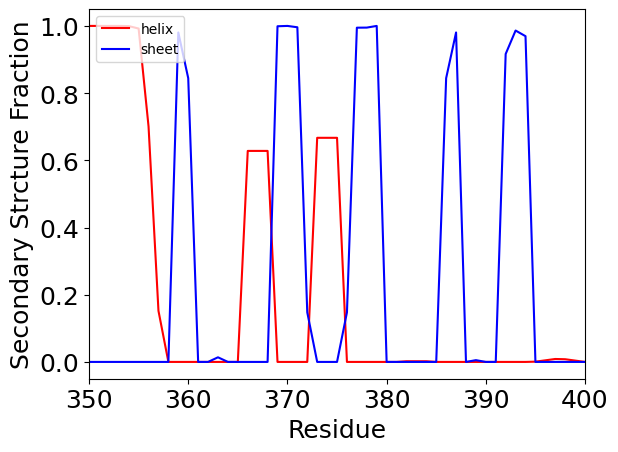

In [12]:
dssp=md.compute_dssp(trj,simplified=True) #one binary sheet or not, one binary are you a helix or not

def dssp_convert(dssp):
 dsspH=np.copy(dssp)
 dsspE=np.copy(dssp)
 dsspH[dsspH=='H']=1                                                                                      
 dsspH[dsspH=='E']=0                                                                                      
 dsspH[dsspH=='C']=0                                                                                      
 dsspH[dsspH=='NA']=0 
 dsspH=dsspH.astype(int) #convert to integers
 TotalH=np.sum(dsspH,axis=1)  # number of H in each frame (row)
 Hprop=np.sum(dsspH,axis=0).astype(float)/len(dsspE) #this sums down each column and divides by length, gives a vector that is the fraction of helices in each row. 

 dsspE[dsspE=='H']=0
 dsspE[dsspE=='E']=1
 dsspE[dsspE=='C']=0
 dsspE[dsspE=='NA']=0
 dsspE=dsspE.astype(int)
 TotalE=np.sum(dsspE,axis=1) 
 Eprop=np.sum(dsspE,axis=0).astype(float)/len(dsspE) 
 return Hprop, Eprop

Hprop,Eprop=dssp_convert(dssp)
plt.plot(residue_num,Hprop,c='r',label='helix')
plt.plot(residue_num,Eprop,c='b',label='sheet')

plt.legend(loc="upper left")
plt.xlabel('Residue', size=18)
plt.ylabel('Secondary Strcture Fraction', size=18)
plt.tick_params(labelsize=18)
plt.xlim(350,400)
#plt.xlim(242,400)

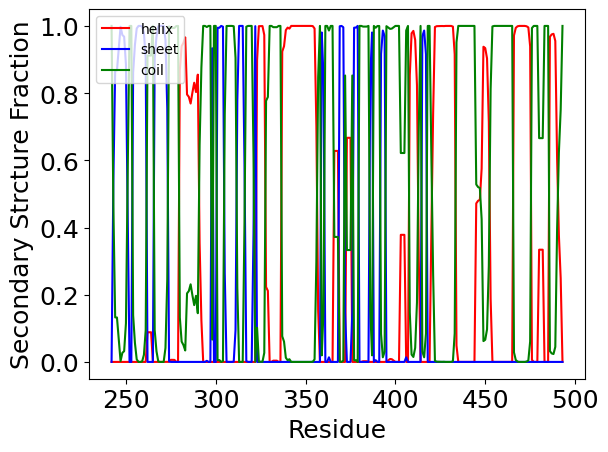

In [13]:
dssp=md.compute_dssp(trj,simplified=True) #one binary sheet or not, one binary are you a helix or not

def dssp_convert(dssp):
 dsspH=np.copy(dssp)
 dsspE=np.copy(dssp)
 dsspC=np.copy(dssp)
 dsspH[dsspH=='H']=1                                                                                      
 dsspH[dsspH=='E']=0                                                                                      
 dsspH[dsspH=='C']=0                                                                                      
 dsspH[dsspH=='NA']=0 
 dsspH=dsspH.astype(int) #convert to integers
 TotalH=np.sum(dsspH,axis=1)  # number of H in each frame (row)
 Hprop=np.sum(dsspH,axis=0).astype(float)/len(dsspE) #this sums down each column and divides by length, gives a vector that is the fraction of helices in each row. 

 dsspE[dsspE=='H']=0
 dsspE[dsspE=='E']=1
 dsspE[dsspE=='C']=0
 dsspE[dsspE=='NA']=0
 dsspE=dsspE.astype(int)
 TotalE=np.sum(dsspE,axis=1) 
 Eprop=np.sum(dsspE,axis=0).astype(float)/len(dsspE) 
    
 dsspC[dsspC=='H']=0
 dsspC[dsspC=='E']=0
 dsspC[dsspC=='C']=1
 dsspC[dsspC=='NA']=0
 dsspC=dsspC.astype(int)
 TotalC=np.sum(dsspC,axis=1) 
 Cprop=np.sum(dsspC,axis=0).astype(float)/len(dsspC) 
 return Hprop, Eprop, Cprop

Hprop,Eprop,Cprop=dssp_convert(dssp)
plt.plot(residue_num,Hprop,c='r',label='helix')
plt.plot(residue_num,Eprop,c='b',label='sheet')
plt.plot(residue_num,Cprop,c='g',label='coil')
plt.legend(loc="upper left")
plt.xlabel('Residue', size=18)
plt.ylabel('Secondary Strcture Fraction', size=18)
plt.tick_params(labelsize=18)


***HOMEWORK Problem 1***

**Use the full DSSP set of secondary structure assignments to plot the population of another secondary structure type and visualize it with a representative frame or frames in VMD**

**Consult the original DSSP paper (or online documentaiton) to confirm the criteria for this assignment** 

Kabsch W, Sander C (1983). “Dictionary of protein secondary structure: pattern recognition of hydrogen-bonded and geometrical features”. Biopolymers 22 (12): 2577-637. doi:10.1002/bip.360221211

dssp=md.compute_dssp(trj,simplified=False)

https://mdtraj.org/1.9.4/api/generated/mdtraj.compute_dssp.html

The DSSP assignment codes are:

‘H’ : Alpha helix

‘B’ : Residue in isolated beta-bridge

‘E’ : Extended strand, participates in beta ladder

‘G’ : 3-helix (3/10 helix)

‘I’ : 5 helix (pi helix)

‘T’ : hydrogen bonded turn

‘S’ : bend

‘ ‘ : Loops and irregular elements

The simplified DSSP codes are:

‘H’ : Helix. Either of the ‘H’, ‘G’, or ‘I’ codes.

‘E’ : Strand. Either of the ‘E’, or ‘B’ codes.

‘C’ : Coil. Either of the ‘T’, ‘S’ or ‘ ‘ codes.

SS: H [281 282 283 324 325 326 327 337 338 339 340 341 342 343 344 345 346 347
 348 349 350 351 352 353 354 355 410 411 422 423 424 425 426 427 428 429
 430 431 432 433 466 467 468 469 470 471 472 473 474 475 486 487 488 489]
SS: E [246 247 248 249 255 256 257 258 259 260 261 266 267 268 269 270 271 272
 301 302 303 304 313 314 315 369 370 371 377 378 379 392 393 394 415 416
 417]
SS: I []
SS: G []
SS: B [298]
SS: T [262 263 264 265 275 276 277 296 297 319 320 332 333 334 358 418 419 434
 435]
SS: S [307 308 309 310 390 391 414 436 439 440 478 479 483]
SS:   [242 274 279 293 294 299 300 311 317 318 331 336 361 363 364 380 381 382
 385 388 402 407 437 438 444 457 459 460 461 465 477 484 485 493]


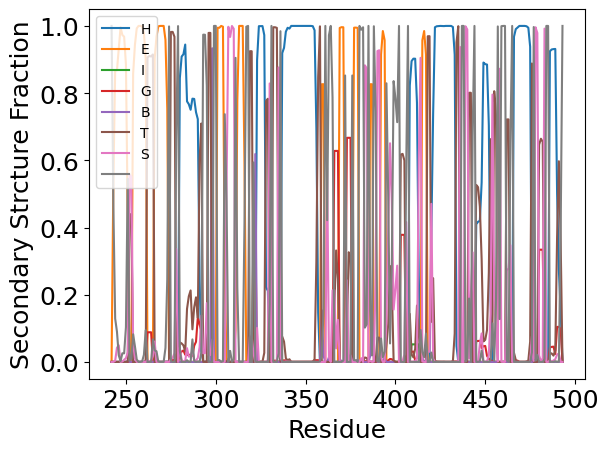

In [15]:
####HOMEWORK ######
#Use the full DSSP Definition and plot the population of another secondary structure type 
#https://mdtraj.org/1.9.4/api/generated/mdtraj.compute_dssp.html
#This will plot all of them
dssp_full=md.compute_dssp(trj,simplified=False)

def dssp_convert_type(dssp,type):
 dsspS=np.copy(dssp)
 dsspS[dsspS!=type]=0                                                                                      
 dsspS[dsspS==type]=1   # you could do this with an if as well                                                                                   
 dsspS=dsspS.astype(int)
 TotalS=np.sum(dsspS,axis=1) 
 Sprop=np.sum(dsspS,axis=0).astype(float)/len(dsspS) 
 return Sprop

for t in ['H','E','I','G','B','T','S',' ']:
  Tprop=dssp_convert_type(dssp_full,t)
  plt.plot(residue_num,Tprop,label=t)
  print("SS:",t,np.asarray(residue_num)[np.where(Tprop>.90)])

plt.legend(loc="upper left")
plt.xlabel('Residue', size=18)
plt.ylabel('Secondary Strcture Fraction', size=18)
plt.tick_params(labelsize=18)



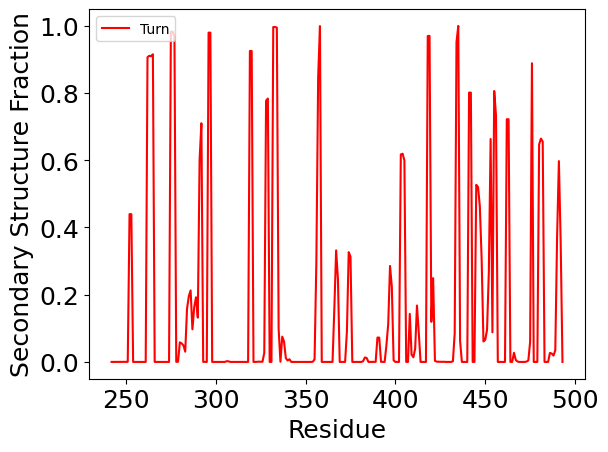

In [17]:
#Plot just 'T' turn population
dsspT=np.copy(dssp_full)
dsspT[dsspT!='T']=0
dsspT[dsspT=='T']=1
dsspT=dsspT.astype(int)
TotalT=np.sum(dsspT,axis=1)
#calculate the column-wise mean by adding elements in each column and dividing by the number of frames
Tprop=np.sum(dsspT,axis=0).astype(float)/len(dsspT)
#plot the population of 3-Helix
plt.plot(residue_num,Tprop,c='r',label='Turn')
plt.legend(loc="upper left")
plt.xlabel('Residue', size=18)
plt.ylabel('Secondary Structure Fraction', size=18)
plt.tick_params(labelsize=18)

***Challenge Problem #1***

**Write function/efficient loop to calculate all secondary structure populations from the dssp_full definitions 
and write out all residues numbers with > 90% of each seondary structure type**

SS: H [281 282 283 324 325 326 327 337 338 339 340 341 342 343 344 345 346 347
 348 349 350 351 352 353 354 355 410 411 422 423 424 425 426 427 428 429
 430 431 432 433 466 467 468 469 470 471 472 473 474 475 486 487 488 489]
SS: E [246 247 248 249 255 256 257 258 259 260 261 266 267 268 269 270 271 272
 301 302 303 304 313 314 315 369 370 371 377 378 379 392 393 394 415 416
 417]
SS: I []
SS: G []
SS: B [298]
SS: T [262 263 264 265 275 276 277 296 297 319 320 332 333 334 358 418 419 434
 435]
SS: S [307 308 309 310 390 391 414 436 439 440 478 479 483]
SS:   [242 274 279 293 294 299 300 311 317 318 331 336 361 363 364 380 381 382
 385 388 402 407 437 438 444 457 459 460 461 465 477 484 485 493]


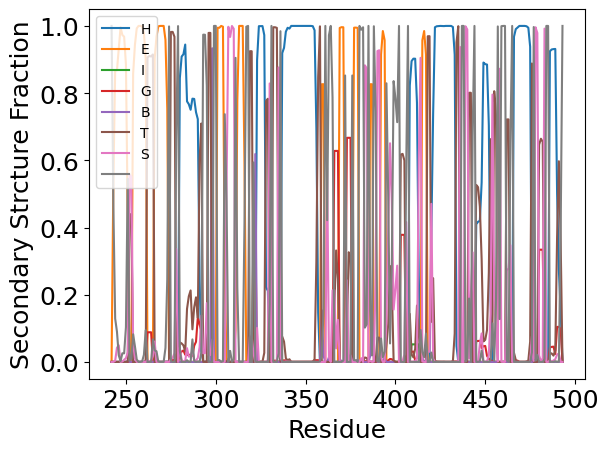

In [18]:
#### Challenge Problem Write a Function to Compute the Population of Any Secondary Structure Type
#### Write a loop to plot all populations
#### Write code to output the residue numbers of every residue with > 90% each SS type

dssp_full=md.compute_dssp(trj,simplified=False)

def dssp_convert_type(dssp,type):
 dsspS=np.copy(dssp)
 dsspS[dsspS!=type]=0                                                                                      
 dsspS[dsspS==type]=1   # you could do this with an if as well                                                                                   
 dsspS=dsspS.astype(int)
 TotalS=np.sum(dsspS,axis=1) 
 Sprop=np.sum(dsspS,axis=0).astype(float)/len(dsspS) 
 return Sprop

for t in ['H','E','I','G','B','T','S',' ']:
  Tprop=dssp_convert_type(dssp_full,t)
  plt.plot(residue_num,Tprop,label=t)
  print("SS:",t,np.asarray(residue_num)[np.where(Tprop>.90)])

plt.legend(loc="upper left")
plt.xlabel('Residue', size=18)
plt.ylabel('Secondary Strcture Fraction', size=18)
plt.tick_params(labelsize=18)


***HOMEWORK Problem 2***

**Identify a residue that has a substantial population (>10%) of a second secondary structure assignment 
(for example something that is 50% helix/ 50% coil or 80% helix/ 20% coil) and make representative snapshots to illustrate the 2 conformations.  Can you identify any other structural changes in the vicinity of that residue that favor the 2nd conformation**

Residues with population of H between 40% and 60%: [445 446 447 448 490]
Residues with population of E between 40% and 60%: [243 251 316]
Residues with population of I between 40% and 60%: []
Residues with population of G between 40% and 60%: []
Residues with population of B between 40% and 60%: []
Residues with population of T between 40% and 60%: [252 253 405 445 446 447 491]
Residues with population of S between 40% and 60%: [252 253 306 362 398 406 420]
Residues with population of   between 40% and 60%: [243 251 306 316 321 362 396 406]


(444.0, 450.0)

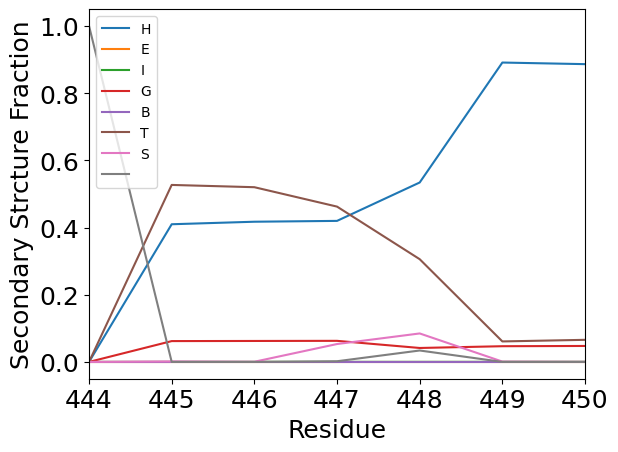

In [19]:
#I isolated out residues that exist as one secondary structure type between 40 and 60% of the time
#After this, I looked through the output for overlap among residues
#For example, 445, 446, and 447 are either H or T 40 to 60% of the time. 
#This can also be seen with the plot below
dssp_full=md.compute_dssp(trj,simplified=False)

def dssp_convert_type(dssp,type):
 dsspS=np.copy(dssp)
 dsspS[dsspS!=type]=0                                                                                      
 dsspS[dsspS==type]=1   # you could do this with an if as well                                                                                   
 dsspS=dsspS.astype(int)
 TotalS=np.sum(dsspS,axis=1) 
 Sprop=np.sum(dsspS,axis=0).astype(float)/len(dsspS) 
 return TotalS, Sprop

# Define the secondary structure types
secondary_structure_types = ['H', 'E', 'I', 'G', 'B', 'T', 'S', ' ']

for t in secondary_structure_types:
    TotalS, Tprop = dssp_convert_type(dssp_full, t)
    residues_within_range = np.where((Tprop >= 0.4) & (Tprop <= 0.6))[0]
    plt.plot(residue_num,Tprop,label=t)
    print("Residues with population of", t, "between 40% and 60%:", np.asarray(residue_num)[residues_within_range])

plt.legend(loc="upper left")
plt.xlabel('Residue', size=18)
plt.ylabel('Secondary Strcture Fraction', size=18)
plt.tick_params(labelsize=18)
plt.xlim(444,450)

In [20]:
#find out what index numbers correspond to 445, 446, and 447
index_number = np.where(residue_id == 445)[0]
print("Index number of value 445:", index_number)
index_number2 = np.where(residue_id == 446)[0]
print("Index number of value 446:", index_number2)
index_number3 = np.where(residue_id == 447)[0]
print("Index number of value 447:", index_number3)

Index number of value 445: [203]
Index number of value 446: [204]
Index number of value 447: [205]


In [21]:
import numpy as np

# Define the list of residue numbers of interest
residue_numbers = [203, 204, 205]

# Assuming dssp_full is defined

# Iterate over each residue number
for residue_number in residue_numbers:
    array_index = residue_number - 0
    print("Residue Number:", np.asarray(residue_id)[array_index])

    # Search for helix ('H') frames
    helix_frames = np.where(dssp_full[:, array_index] == 'H')[0]
    print("Frames where residue", residue_number, "is assigned as helix ('H'):", helix_frames)

    # Search for turn ('T') frames
    turn_frames = np.where(dssp_full[:, array_index] == 'T')[0]
    print("Frames where residue", residue_number, "is assigned as turn ('T'):", turn_frames)

Residue Number: 445
Frames where residue 203 is assigned as helix ('H'): [   2    3    6 ... 3990 3997 3999]
Frames where residue 203 is assigned as turn ('T'): [   1    4    5 ... 3995 3996 3998]
Residue Number: 446
Frames where residue 204 is assigned as helix ('H'): [   2    3    6 ... 3990 3997 3999]
Frames where residue 204 is assigned as turn ('T'): [   1    4    5 ... 3995 3996 3998]
Residue Number: 447
Frames where residue 205 is assigned as helix ('H'): [   2    3    6 ... 3990 3997 3999]
Frames where residue 205 is assigned as turn ('T'): [   0    1    4 ... 3995 3996 3998]


In [22]:
#these are the functions of MD to spit out all the phi, psi, and chi values in arrays that tell you the index of the residues and what the values are
indices_phi, phis = md.compute_phi(trj)
indices_psi, psis = md.compute_psi(trj)
indices_chi1, chi1s = md.compute_chi1(trj)
indices_chi2, chi2s = md.compute_chi2(trj)

In [23]:
np.shape(phis[:,0])

(4000,)

In [24]:
np.shape(indices_phi) #atoms used to calculate phi (251)

(251, 4)

In [25]:
indices_phi

array([[  19,   21,   23,   33],
       [  33,   35,   37,   50],
       [  50,   52,   54,   72],
       ...,
       [4012, 4014, 4016, 4029],
       [4029, 4031, 4033, 4039],
       [4039, 4041, 4043, 4059]])

In [26]:
phis[0]

array([-1.3348945 , -2.4162273 , -1.6260034 , -2.7420444 , -1.1720566 ,
       -1.768666  ,  2.9660985 , -1.696113  , -3.026429  ,  0.8130229 ,
       -2.117986  ,  1.2929912 , -1.6181855 , -2.1634047 , -2.3182447 ,
       -1.7396924 , -2.637885  , -2.7224255 , -2.1119921 , -0.9397277 ,
       -0.9503051 , -2.0437884 ,  0.83756715, -2.4364717 , -1.3276514 ,
       -2.4697032 , -2.0207238 , -2.1852038 , -1.5518311 , -1.7492007 ,
       -1.2537569 , -1.2818615 , -1.1935683 , -1.4355463 , -2.373769  ,
       -1.3213415 , -2.1482513 , -1.0968212 , -1.142294  , -1.2364907 ,
       -0.9192991 , -1.1076386 , -1.5192405 , -0.995332  , -1.3402086 ,
       -1.6225383 , -2.2133064 , -1.1590345 , -1.3666246 , -2.2732563 ,
       -1.96109   , -1.6550772 , -1.60299   , -1.0264511 , -1.3280267 ,
       -1.9476197 , -1.3299682 , -1.7717222 , -1.4707007 , -1.623109  ,
        2.882436  , -2.3224494 , -1.6406348 , -2.2717829 , -1.4182893 ,
       -1.5875534 , -0.8990867 , -1.4512718 , -2.0893397 , -1.81

In [27]:
phi_dict={} # empty, leaves places to store these new values, so that you don't have to keep track of where things are indexes, helpful for phis and psis
dihedral_dict = { 'phi': { },
          'psi': { },
          'chi1': { },
          'chi2': { }}

for i in range(0,len(indices_phi)): #goes over phi, pulls out indices, takes the atoms, get the resnum, and put in your dict the phi values, and put in dictionary
  indices=indices_phi[i]
  atom=top.atom(indices[1])
  resnum=top.atom(indices[1]).residue.resSeq
  dihedral_dict['phi'][resnum]=phis[:,i]

for i in range(0,len(indices_psi)):#' ' 
  indices=indices_psi[i]
  atom=top.atom(indices[1])
  resnum=top.atom(indices[1]).residue.resSeq
  dihedral_dict['psi'][resnum]=psis[:,i]

for i in range(0,len(indices_chi1)):
  indices=indices_chi1[i]
  atom=top.atom(indices[1])
  resnum=top.atom(indices[1]).residue.resSeq
  dihedral_dict['chi1'][resnum]=chi1s[:,i]

for i in range(0,len(indices_chi2)):
  indices=indices_chi2[i]
  atom=top.atom(indices[1])
  resnum=top.atom(indices[1]).residue.resSeq
  dihedral_dict['chi2'][resnum]=chi2s[:,i]
    

In [28]:
sequence

' [ILE242, THR243, MET244, LYS245, HIS246, LYS247, LEU248, GLY249, GLY250, GLY251, GLN252, TYR253, GLY254, GLU255, VAL256, TYR257, GLU258, GLY259, VAL260, TRP261, LYS262, LYS263, TYR264, SER265, LEU266, THR267, VAL268, ALA269, VAL270, LYS271, THR272, LEU273, LYS274, GLU275, ASP276, THR277, MET278, GLU279, VAL280, GLU281, GLU282, PHE283, LEU284, LYS285, GLU286, ALA287, ALA288, VAL289, MET290, LYS291, GLU292, ILE293, LYS294, HIS295, PRO296, ASN297, LEU298, VAL299, GLN300, LEU301, LEU302, GLY303, VAL304, CYS305, THR306, ARG307, GLU308, PRO309, PRO310, PHE311, TYR312, ILE313, ILE314, THR315, GLU316, PHE317, MET318, THR319, TYR320, GLY321, ASN322, LEU323, LEU324, ASP325, TYR326, LEU327, ARG328, GLU329, CYS330, ASN331, ARG332, GLN333, GLU334, VAL335, ASN336, ALA337, VAL338, VAL339, LEU340, LEU341, TYR342, MET343, ALA344, THR345, GLN346, ILE347, SER348, SER349, ALA350, MET351, GLU352, TYR353, LEU354, GLU355, LYS356, LYS357, ASN358, PHE359, ILE360, HIS361, ARG362, ASP363, LEU364, ALA365, ALA36

In [82]:
#Heres a function to plot a phi/psi ramachandran plot:

def plot_phipsi(res):
 plt.hist2d(dihedral_dict['phi'][res],dihedral_dict['psi'][res],bins=36,range=[[-3.14,3.14],[-3.14,3.14]], norm=colors.LogNorm(),cmap='jet')
 plt.xlabel('$\phi$', size=18)
 plt.ylabel('$\psi$', size=18)
 plt.xticks([-3.14,-3.14/2,0,3.14/2,3.14],fontsize=35)
 plt.yticks([-3.14,-3.14/2,0,3.14/2,3.14],fontsize=35)
 plt.tick_params(labelsize=18)
 plt.show()
 return

def plot_chi(res):
    if res in dihedral_dict['chi1']:
     plt.hist(dihedral_dict['chi1'][res],bins=36,range=[-3.14,3.14])        
     plt.xticks([-3.14,-3.14/2,0,3.14/2,3.14],fontsize=35)
     plt.xlabel('$\chi_1$', size=18)
     plt.ylabel('counts', size=18)
     plt.tick_params(labelsize=18)
     plt.show()
     plt.clf()   
    if res in dihedral_dict['chi2']:
     plt.hist2d(dihedral_dict['chi1'][res],dihedral_dict['chi2'][res],bins=36,range=[[-3.14,3.14],[-3.14,3.14]], norm=colors.LogNorm(),cmap='jet')
     plt.xlabel('$\chi_1$', size=18)
     plt.ylabel('$\chi_2$', size=18)
     plt.xticks([-3.14,-3.14/2,0,3.14/2,3.14],fontsize=35)
     plt.yticks([-3.14,-3.14/2,0,3.14/2,3.14],fontsize=35)
     plt.tick_params(labelsize=18)
     plt.show()
    return




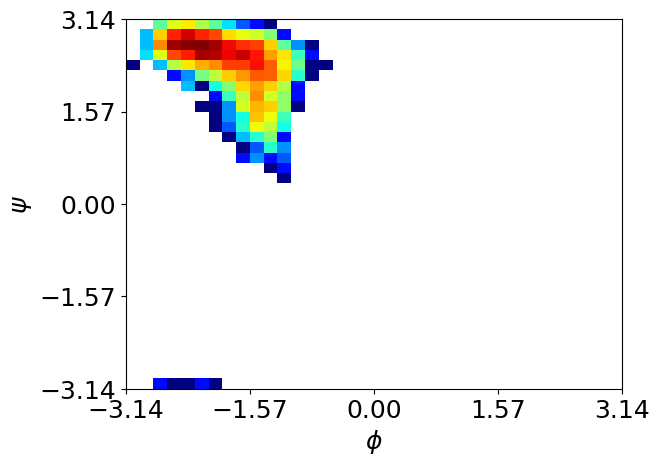

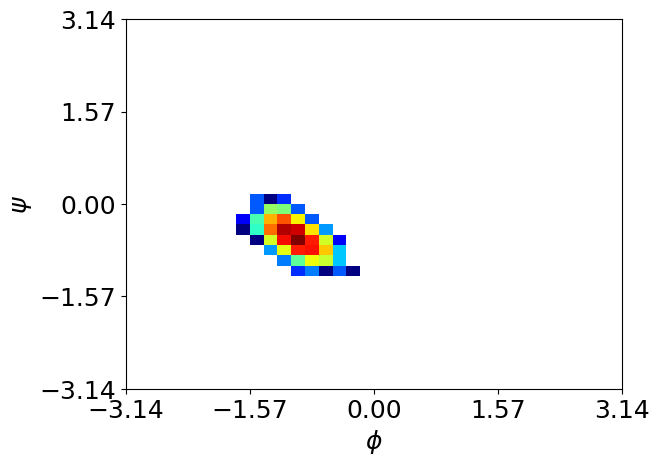

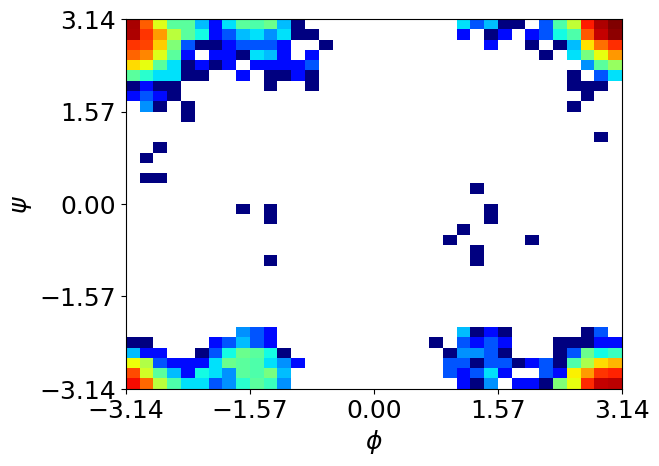

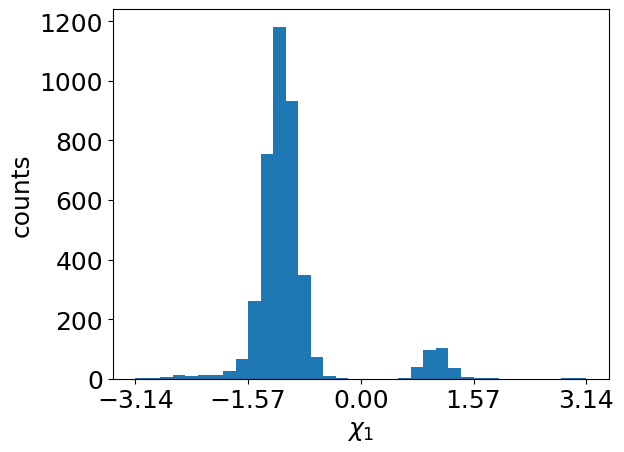

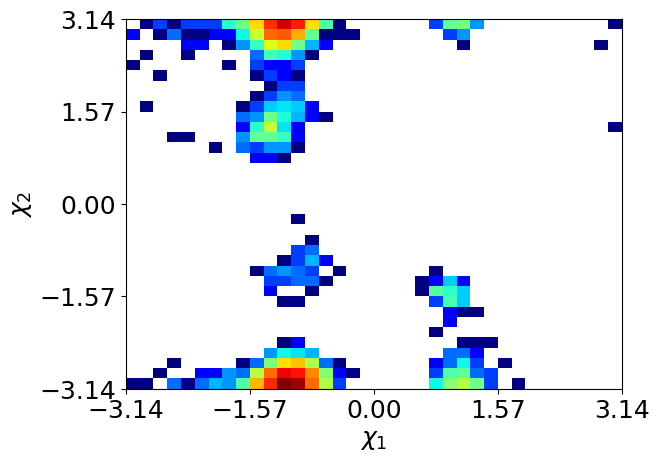

In [83]:
#nice function to plot phispi and plot chi
plot_phipsi(279) #this is a beta sheet
plot_phipsi(408) #this is proline
plot_phipsi(250) #this would be a glycine
plt.clf() #shows you rotomers
plot_chi(308) #shows where dominate and minor rotomers are

In [84]:
#Lets Visualize Some Rotamers
#Lets Find all the VAL residues and plot thier X1 values
CA_sel=top.select('name CA')
resnames=[]
resnums=[]
for i in CA_sel:
 resnum=top.atom(i).residue.resSeq
 resnums.append(resnum)
 resname=top.atom(i).residue.name
 resnames.append(resname)

resnums=np.asarray(resnums)
resnames=np.asarray(resnames)
ASP_indices=np.where(resnames=='ASP')
ASP_resnums=resnums[ASP_indices]
ASP_resnums

array([276, 325, 363, 381, 391, 421, 444, 455, 482])

Residue 276


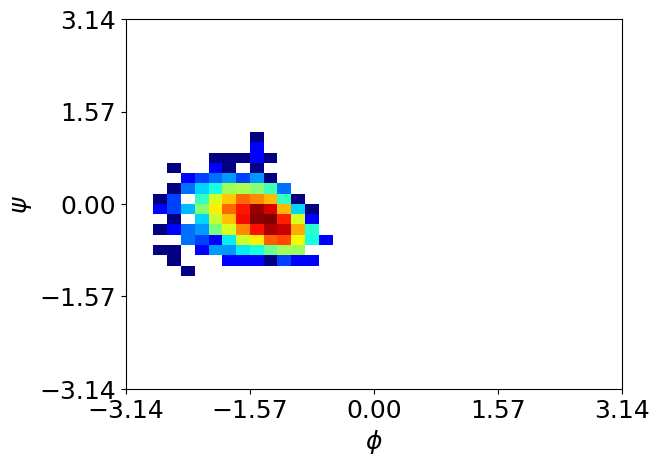

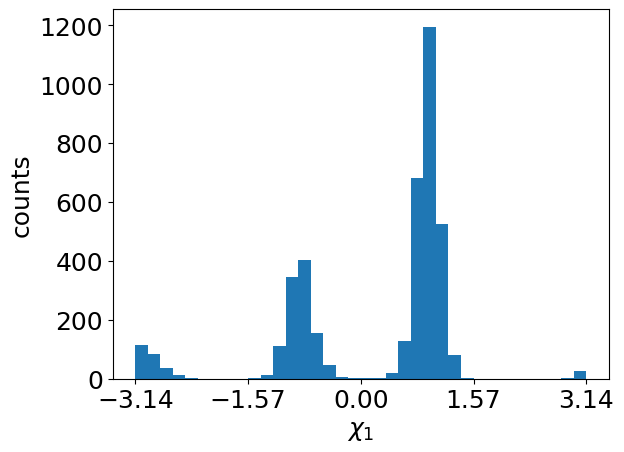

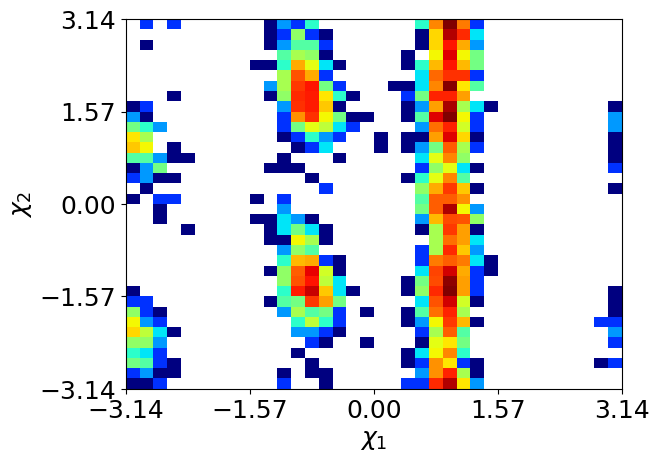

Residue 325


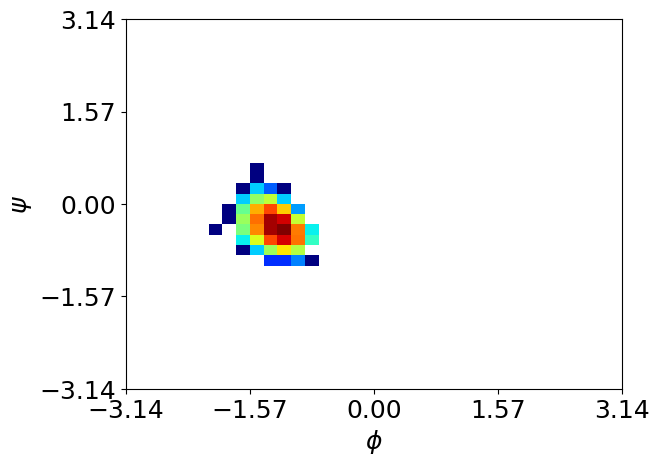

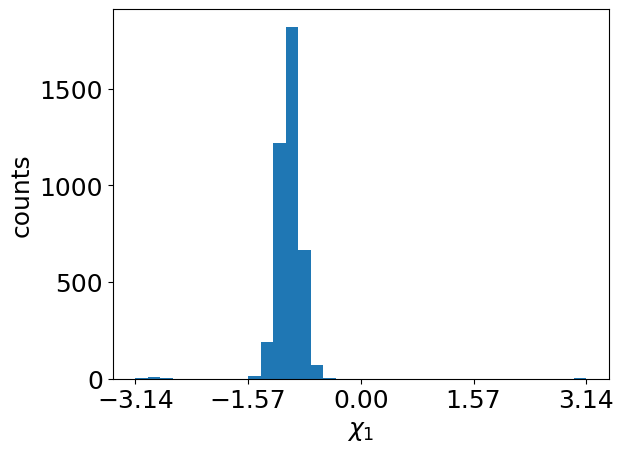

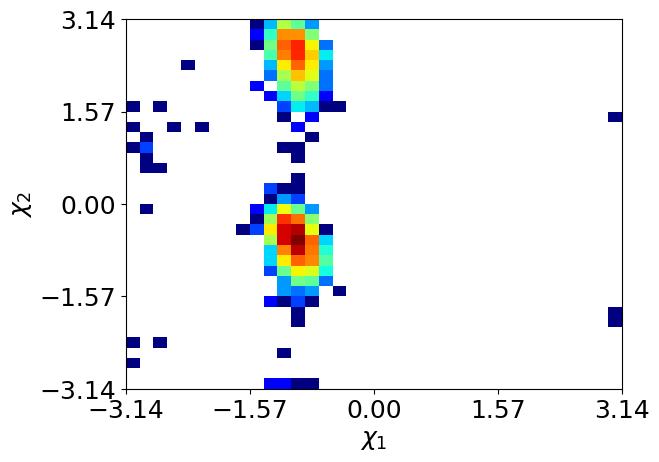

Residue 363


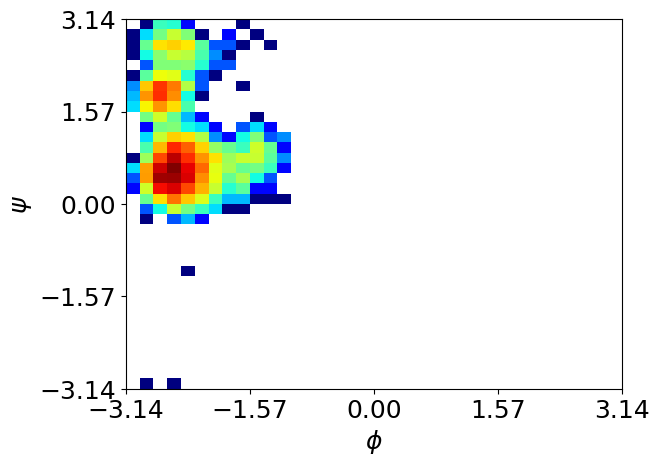

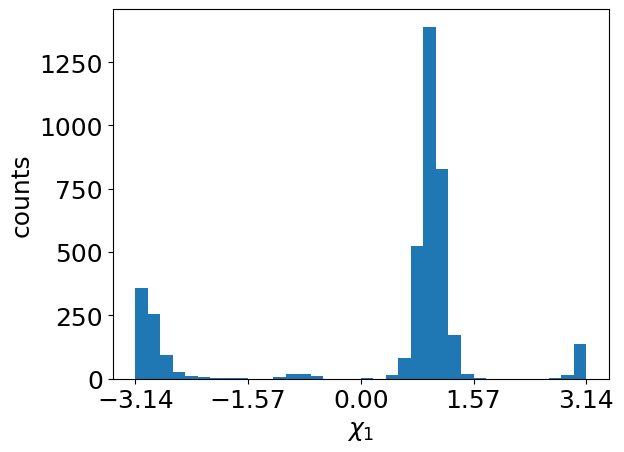

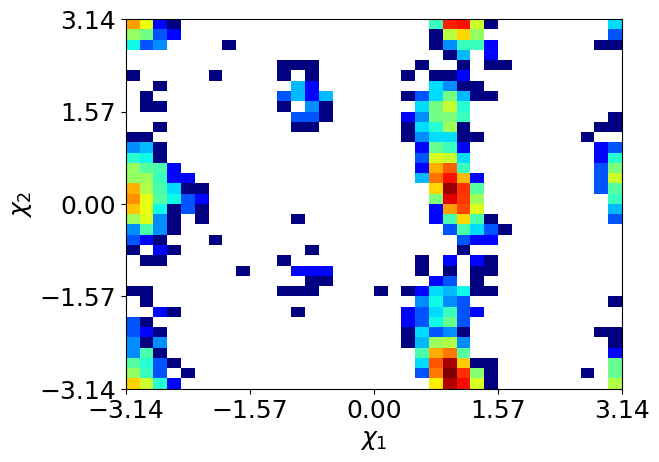

Residue 381


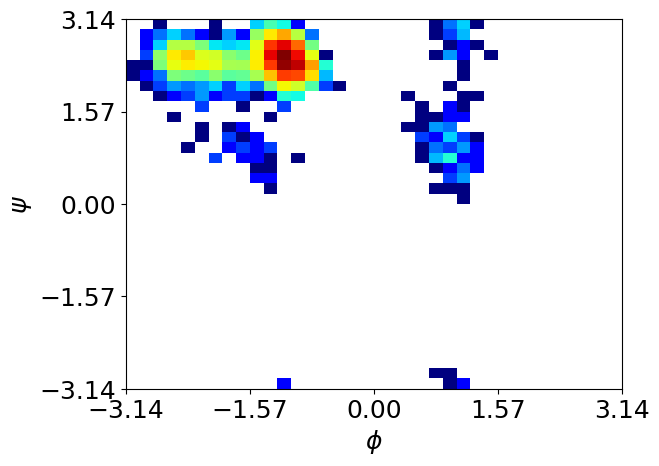

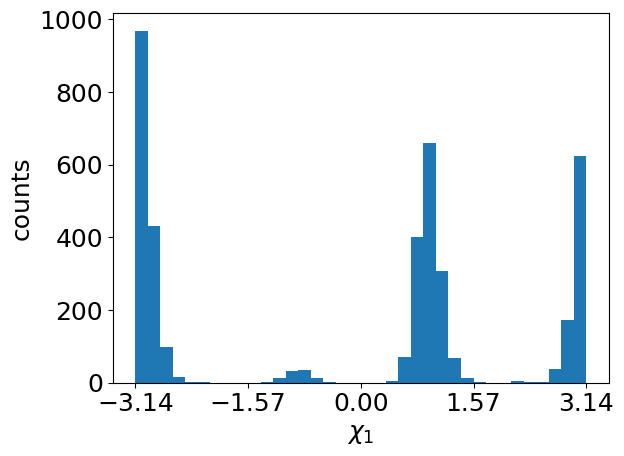

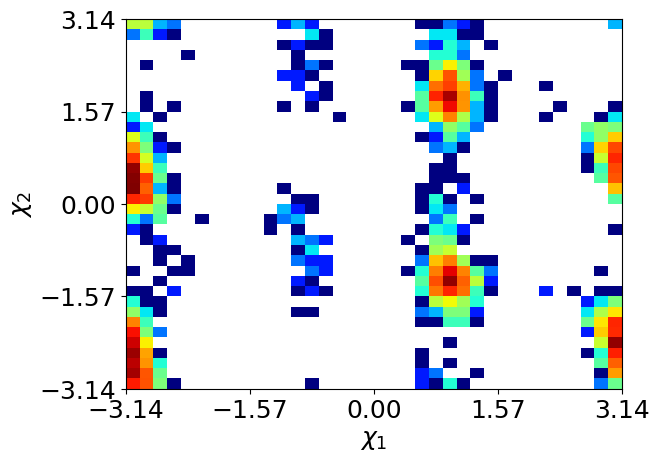

Residue 391


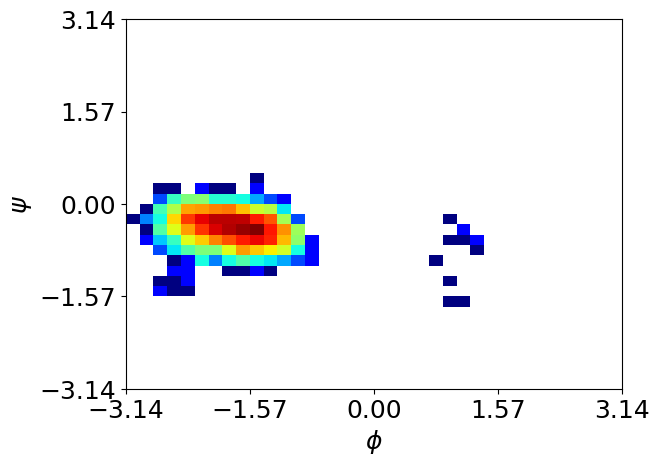

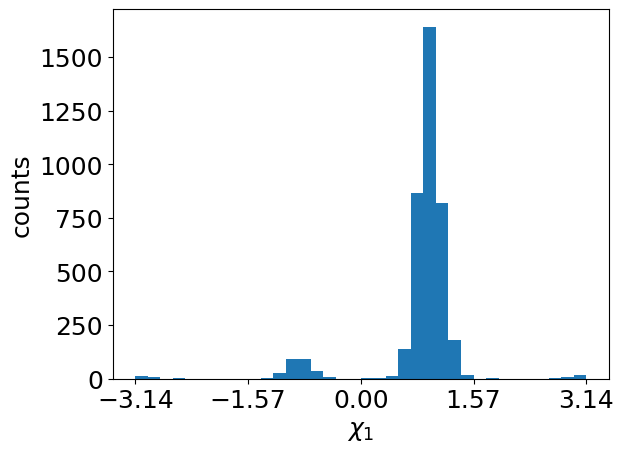

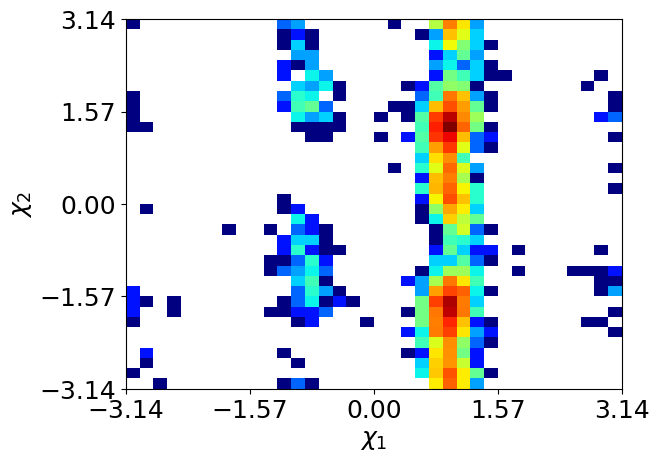

Residue 421


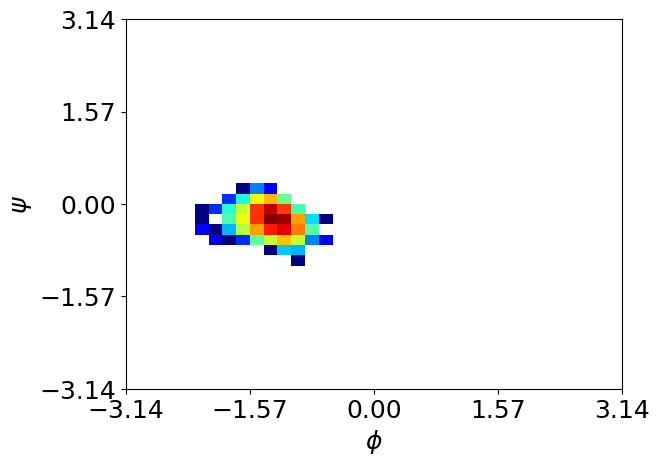

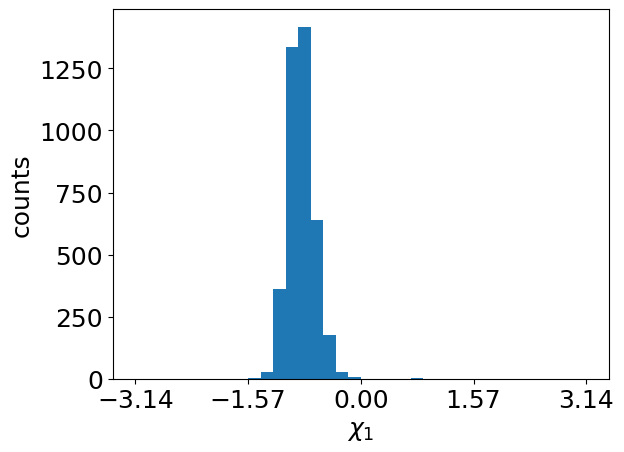

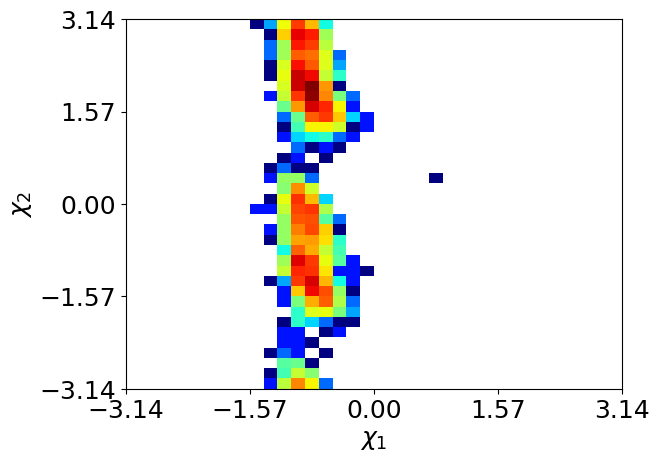

Residue 444


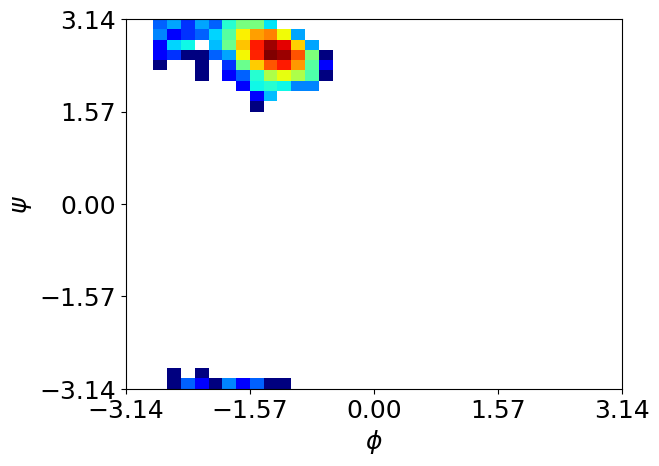

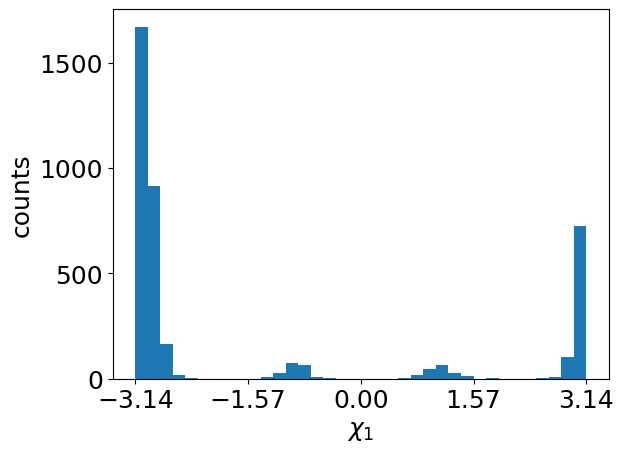

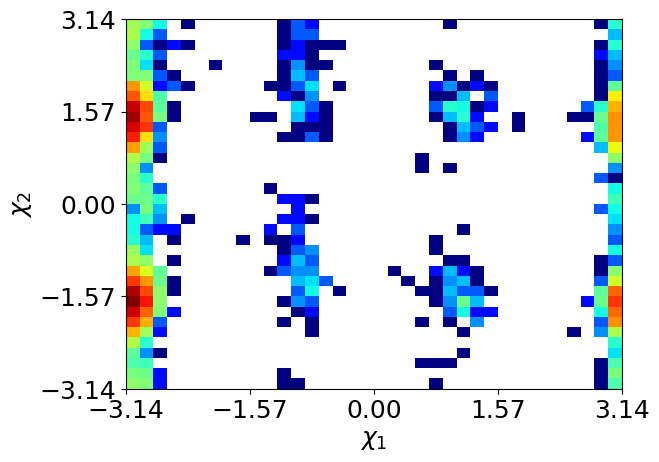

Residue 455


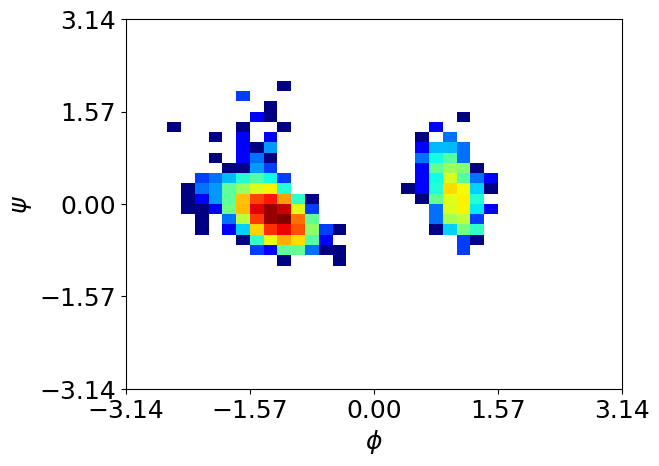

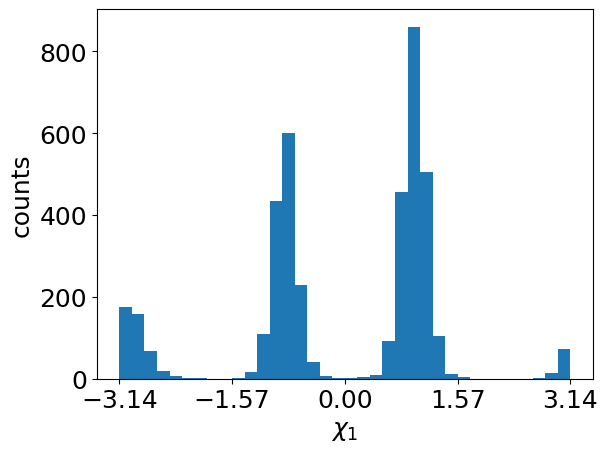

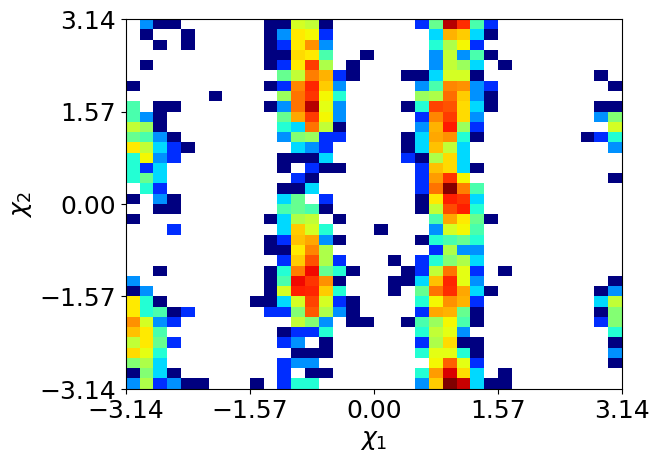

Residue 482


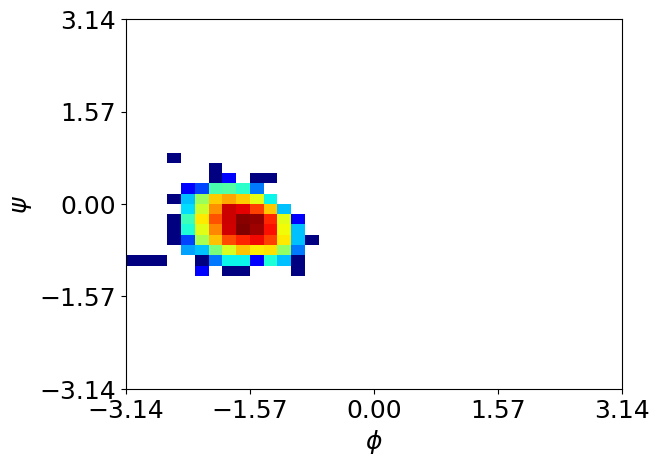

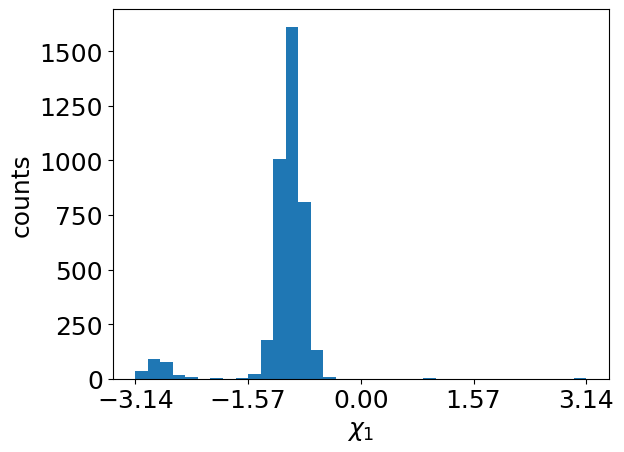

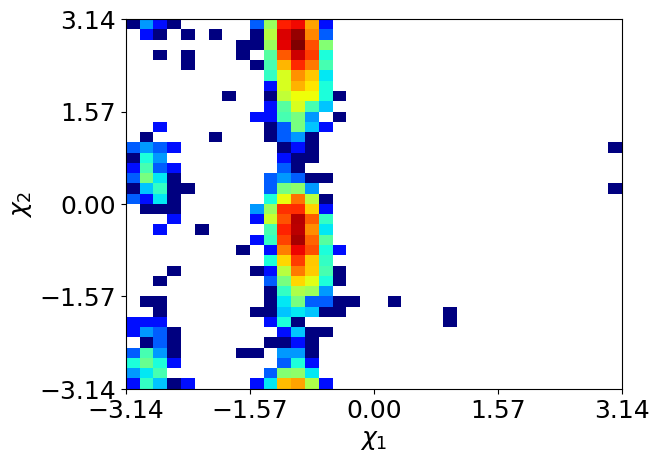

<Figure size 640x480 with 0 Axes>

In [85]:
for i in ASP_resnums:
    print("Residue",i)
    plot_phipsi(i)
    plt.clf()
    plot_chi(i)
    plt.clf()

***HOMEWORK Problem 3***

**Identify a residue that has 2 rotameric states and make representative snapshots to illustrate the 2 conformations (or a single snapshot with an overlay of two representative conformations).  Can you identify any other structural changes in the vicinity of that residue that favor the 2nd conformation.  Make a plot of the Chi 1 histogram (or Chi1/Chi2 if the residue has a Chi2 degree of freedom) and add a marking to the plot to indicate the dihedrals shown in your snapshot**



In [91]:
#Lets Visualize Some Rotamers
#For simplicity, lets look at the LYS residues and plot the X1 values
CA_sel=top.select('name CA')
resnames=[]
resnums=[]
for i in CA_sel:
 resnum=top.atom(i).residue.resSeq
 resnums.append(resnum)
 resname=top.atom(i).residue.name
 resnames.append(resname)

resnums=np.asarray(resnums)
resnames=np.asarray(resnames)
HIS_indices=np.where(resnames=='HIS')
HIS_resnums=resnums[HIS_indices]
HIS_resnums

array([246, 295, 361, 375, 396, 490])

Residue 246


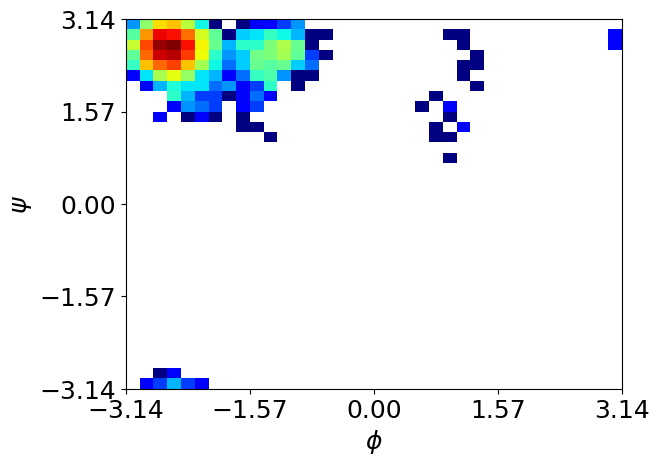

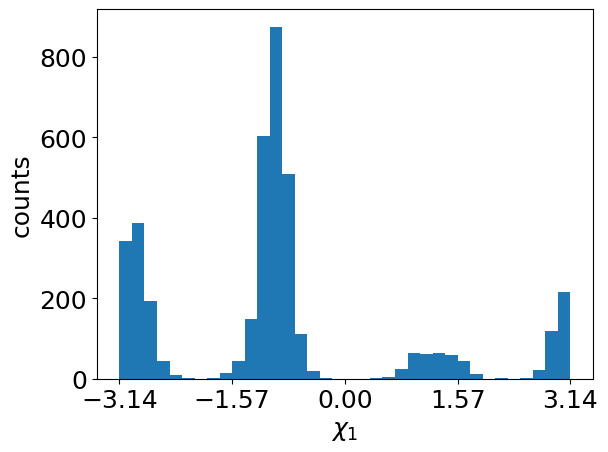

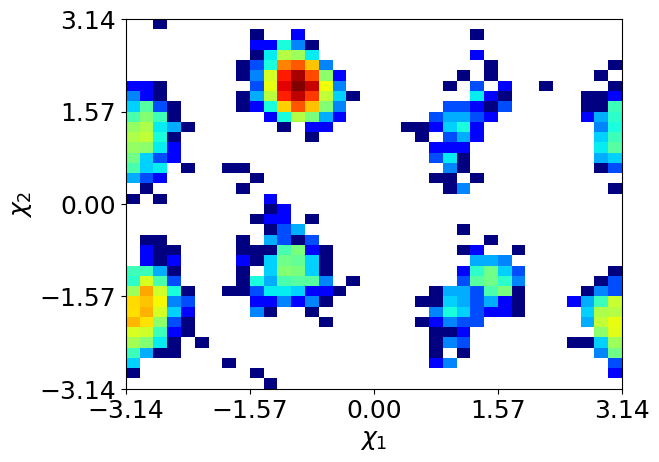

Residue 295


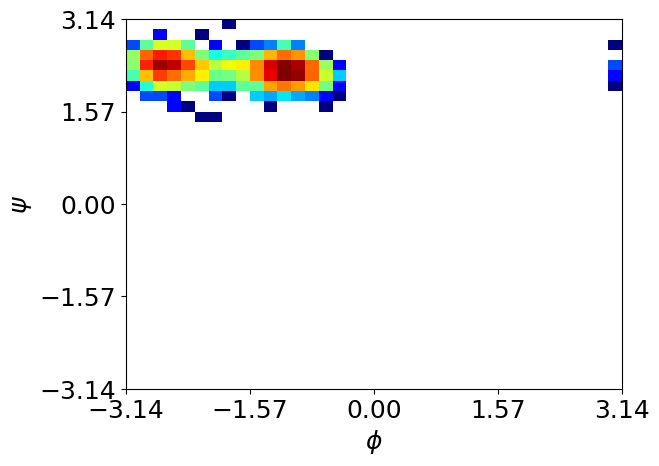

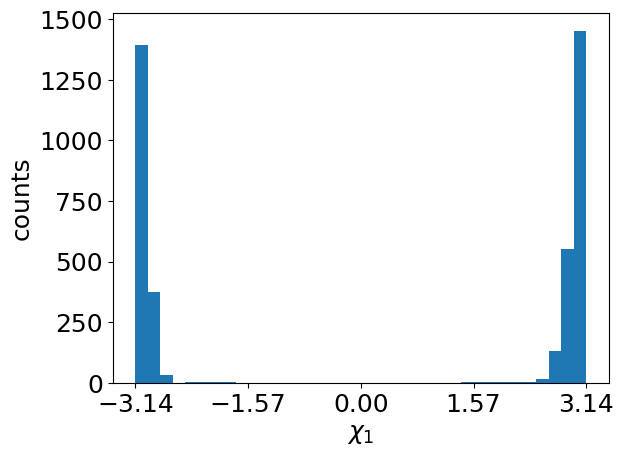

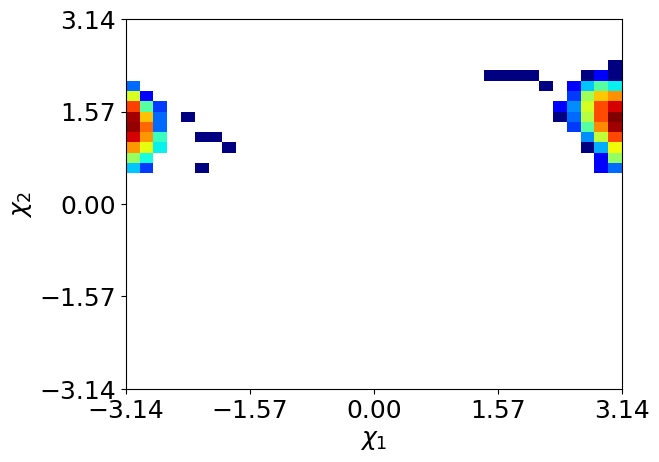

Residue 361


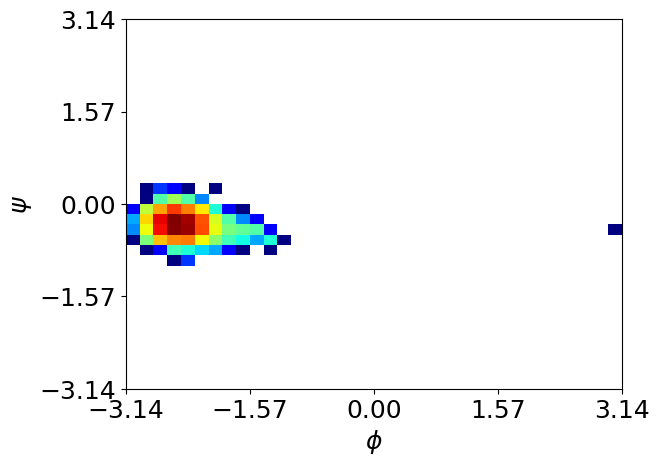

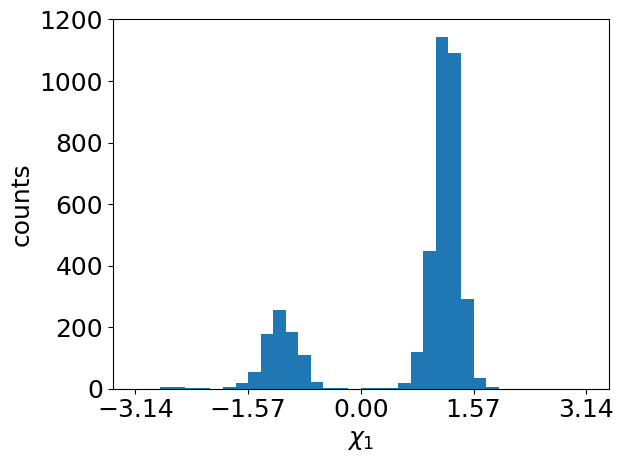

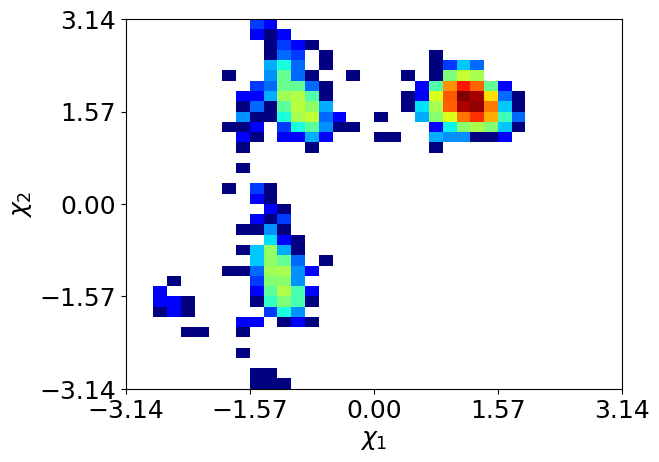

Residue 375


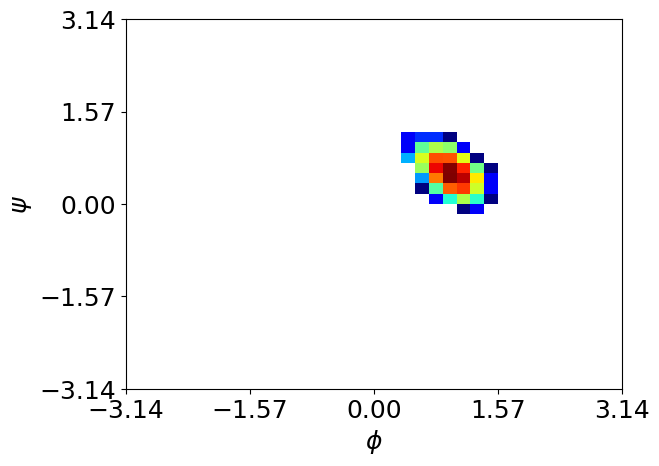

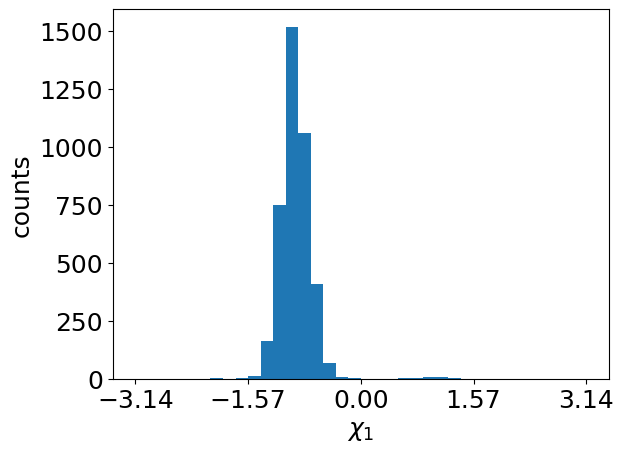

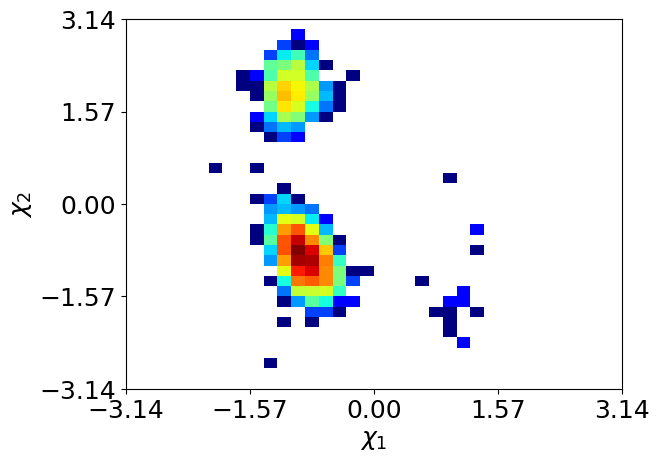

Residue 396


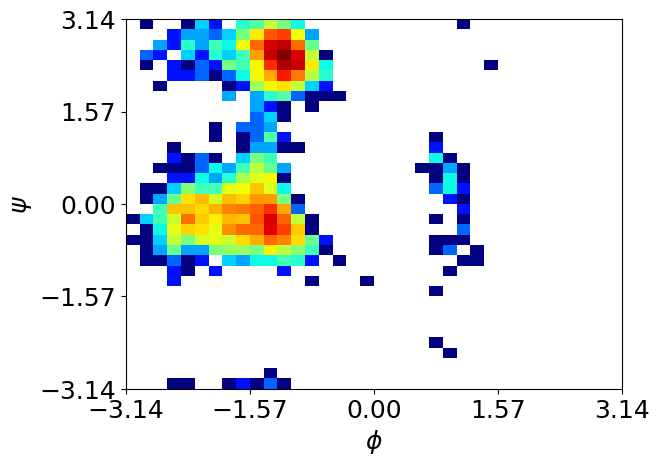

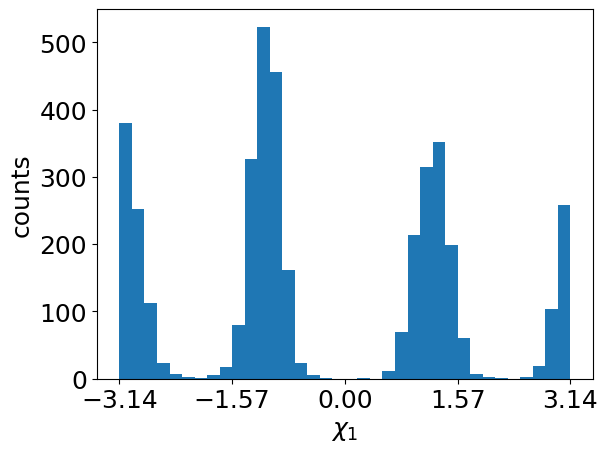

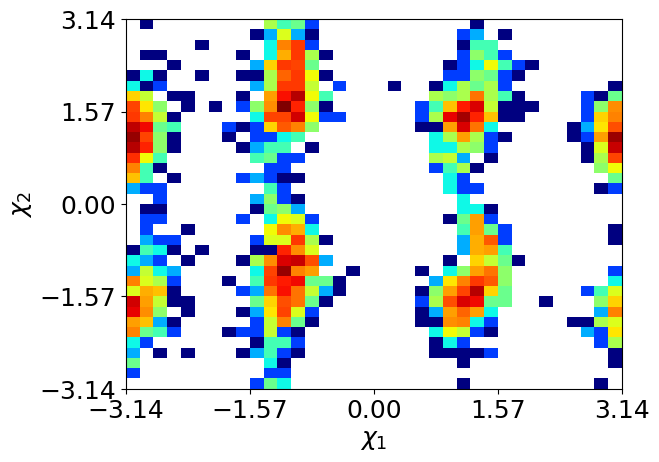

Residue 490


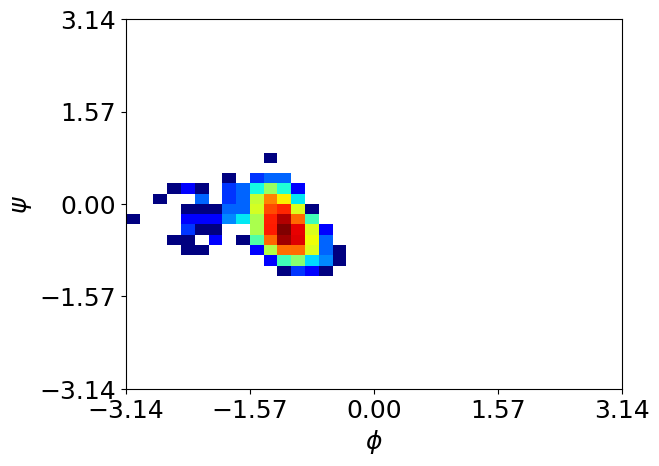

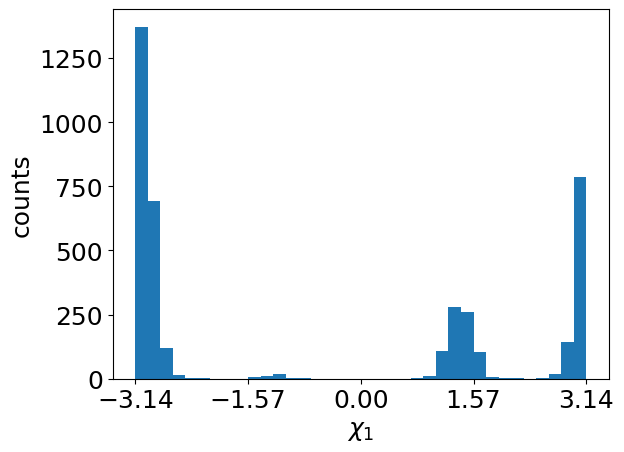

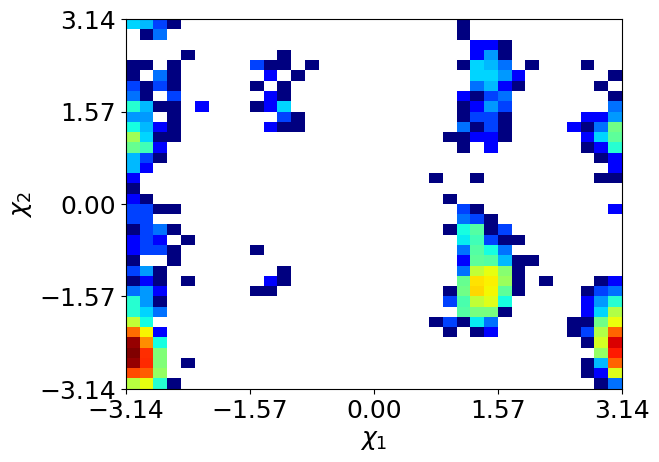

<Figure size 640x480 with 0 Axes>

In [92]:
for i in HIS_resnums:
    print("Residue",i)
    plot_phipsi(i)
    plt.clf()
    plot_chi(i)
    plt.clf()


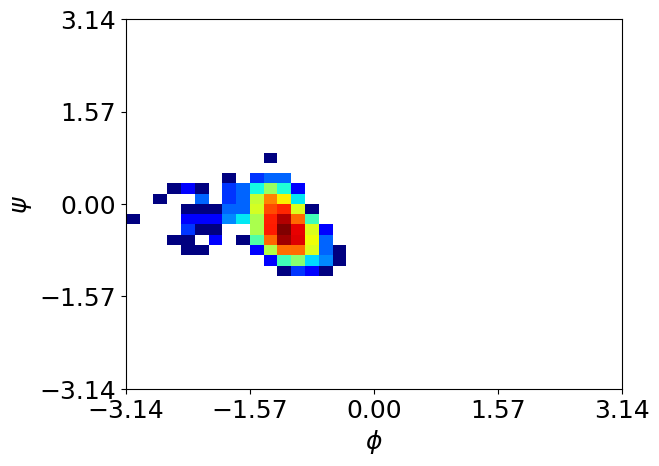

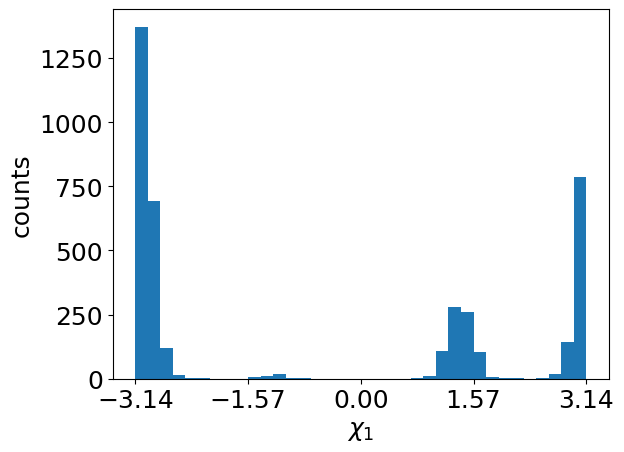

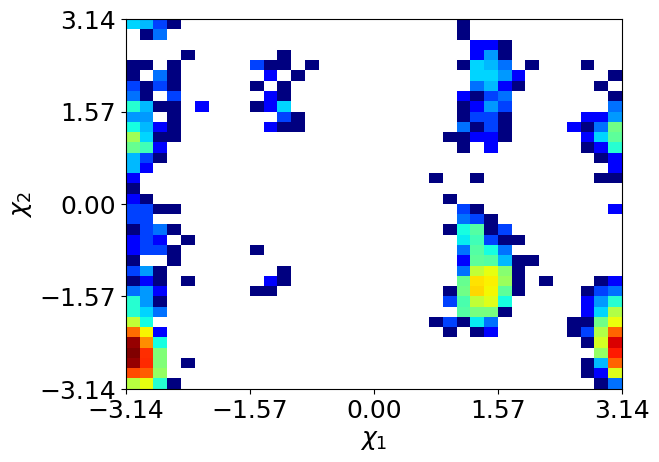

<Figure size 640x480 with 0 Axes>

In [93]:
#Decided to look at HIS 490 rotomers
plot_phipsi(490)
plt.clf()
plot_chi(490)
plt.clf()
#As you can see based on the multiple peaks on the Chi1 plot, this residue exists in mostly in 2 rotomers

In [95]:
#I would like to isolate out the frames where the X1 angle is between 0 and 1.57 (rotomer 1), between 0 and -1.57 to 
#between -1.57 and -3.14 (rotomer 3), and between 1.57 and 3.14 (rotomer 4) determine where HIS490 exists as rotomer 1 or rotomer 2
import numpy as np

# Define the residue number of interest
resnum = 490

# Extract chi1 values for the specified residue number
chi1_values = dihedral_dict['chi1'].get(resnum, None)

if chi1_values is not None:
    # Find frames where chi1 is greater than 0
    frames_with_chi1_1 = np.where((chi1_values < -1.57) & (chi1_values > -3.14))[0]
    frames_with_chi1_2 = np.where((chi1_values < 0) & (chi1_values > -1.57))[0]
    frames_with_chi1_3 = np.where((chi1_values > 0) & (chi1_values < 1.57))[0]
    frames_with_chi1_4 = np.where((chi1_values > 1.57) & (chi1_values < 3.14))[0]

    # Print or use the indices
    print("Frames where chi1 of residue", resnum, "is position 1", frames_with_chi1_1)
    print("Frames where chi1 of residue", resnum, "is position 2", frames_with_chi1_2)
    print("Frames where chi1 of residue", resnum, "is position 3", frames_with_chi1_3)
    print("Frames where chi1 of residue", resnum, "is position 4", frames_with_chi1_4)
else:
    print("No chi1 values found for residue", resnum)

Frames where chi1 of residue 490 is position 1 [   1    4    6 ... 3977 3985 3987]
Frames where chi1 of residue 490 is position 2 [ 782  783  784  785  786  787  788  789  790  791  792  793  794  795
  796  797  798  799  800  801  802  803  804  805  806  807  808  809
  810  811  812  813 1134 1135 1136 1137 1138 1139 1140 2956]
Frames where chi1 of residue 490 is position 3 [ 898  899  900  901  905  906  907  908  909  910  911  912  913  915
  917  918  920  921  922  923  924  925  926  927  929  930  931  932
  933  934  936  938  939  940  941  943  944  945  946  947  948  949
  950  951  952  953  954  956  957  960  962  963  965  966  968  970
  972  973  974  975  976  979  980  981 1481 1482 1483 1485 1487 1488
 1490 1492 1493 1494 1496 1497 1498 1499 1500 1501 1502 1504 1820 1821
 1822 1823 1824 1825 1826 1827 1828 1829 1830 1831 1832 1833 1834 1835
 1836 1838 1839 1840 1841 2058 2059 2060 2061 2062 2068 2069 2070 2076
 2077 2078 2080 2541 2542 2852 2853 2854 2858 2859 

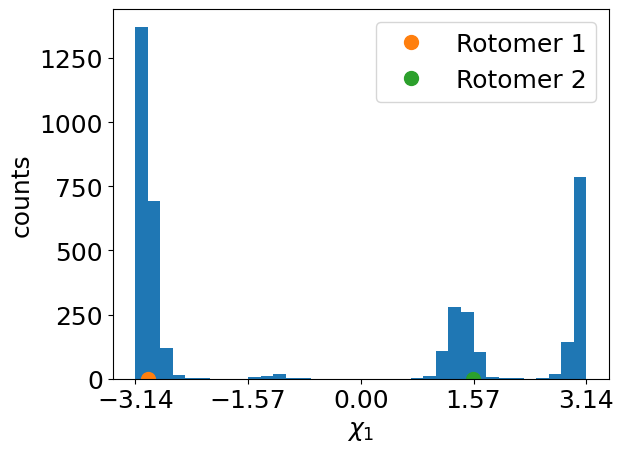

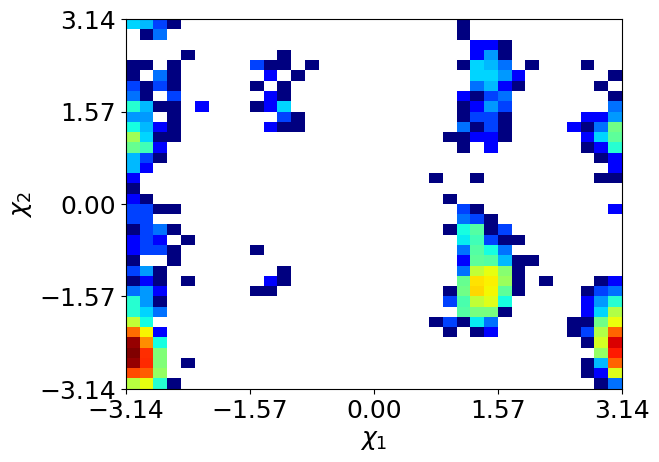

In [102]:
#Here is the plot of Chi1 (Chi2 as well if it existed for this residue) pulling out specific frames 
#frame 1 where 'rotomer 1' exists and frame 129 where 'rotomer 2' exists
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np

def plot_chi(res, frames_to_highlight=None):
    if res in dihedral_dict['chi1']:
        plt.hist(dihedral_dict['chi1'][res], bins=36, range=[-3.14, 3.14])        
        plt.xticks([-3.14, -3.14/2, 0, 3.14/2, 3.14], fontsize=35)
        plt.xlabel('$\chi_1$', size=18)
        plt.ylabel('counts', size=18)
        plt.tick_params(labelsize=18)
        
        # Add points for frames_to_highlight
        if frames_to_highlight:
            for idx, frame_num in enumerate(frames_to_highlight, start=1):
                chi1_value = dihedral_dict['chi1'][res][frame_num - 1]  # Adjust frame number to index
                label = f'Rotomer {idx}'
                plt.plot(chi1_value, 0, 'o', markersize=10, label=label)  
        
        plt.legend(fontsize=18)
        plt.show()
        plt.clf()  
    if res in dihedral_dict['chi2']:
     plt.hist2d(dihedral_dict['chi1'][res],dihedral_dict['chi2'][res],bins=36,range=[[-3.14,3.14],[-3.14,3.14]], norm=colors.LogNorm(),cmap='jet')
     plt.xlabel('$\chi_1$', size=18)
     plt.ylabel('$\chi_2$', size=18)
     plt.xticks([-3.14,-3.14/2,0,3.14/2,3.14],fontsize=35)
     plt.yticks([-3.14,-3.14/2,0,3.14/2,3.14],fontsize=35)
     plt.tick_params(labelsize=18)
     plt.show()
        
    return


# Plot the chi1 histogram for residue 490 pulling frames showing two rotomers
plot_chi(490, frames_to_highlight=[1469, 1499])



***HOMEWORK Problem 4***

**Identify a residue that has 2 phi/psi free energy minima states and make representative snapshots to illustrate representative conformations (or a single snapshot with an overlay of two representative conformations).  Can you identify any other structural changes in the vicinity of that residue that favor the 2nd conformation.  Make a plot of the phi/psi histograms and add marking to the plot to indicate the phi/psi angles shown in your snapshot**


***Challenge Problem 2***

**Identify a residue with phi/psi basins that favor distinct rotamers and make a plot of chi distributions for different regions of the phi/psi basins**


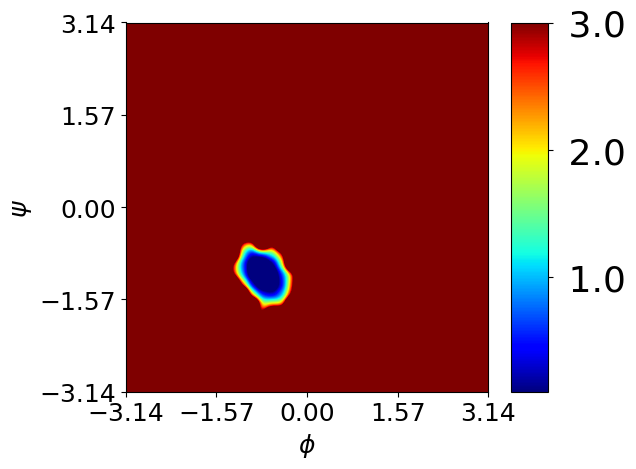

In [23]:
#Lets Make A Pretty Free Energy Plot 

def plot_phipsi_FES(res):
 free_energy,xedges,yedges=np.histogram2d(dihedral_dict['phi'][res],dihedral_dict['psi'][res],36,[[-3.14,3.14],[-3.14,3.14]],density=True,weights=None)
 free_energy=np.log(np.flipud(free_energy)+.000001)
 T=300                                                                                                  
 kbT=T*0.008314/4.184 # kT in kcal/mol
 dG=-(kbT)*free_energy #Convert to kcal/mol
 im=plt.imshow(dG, interpolation='gaussian',extent=[yedges[0], yedges[-1], xedges[0], xedges[-1]],cmap='jet',aspect='auto')
 cbar_ticks=[0,1,2,3]
 cb = plt.colorbar(ticks=cbar_ticks, format=('% .1f'), aspect=10) # grab the Colorbar instance
 imaxes = plt.gca()                                                                                                 
 plt.xticks([-3.14,-3.14/2,0,3.14/2,3.14],fontsize=35)
 plt.yticks([-3.14,-3.14/2,0,3.14/2,3.14],fontsize=35)
 plt.xlabel('$\phi$', size=18)
 plt.ylabel('$\psi$', size=18)
 plt.tick_params(labelsize=18)
 plt.axes(cb.ax)
 plt.clim(vmin=0.1,vmax=3.0)
 plt.yticks(size='26')
 plt.tight_layout()
 plt.show()
 return

plot_phipsi_FES(350)

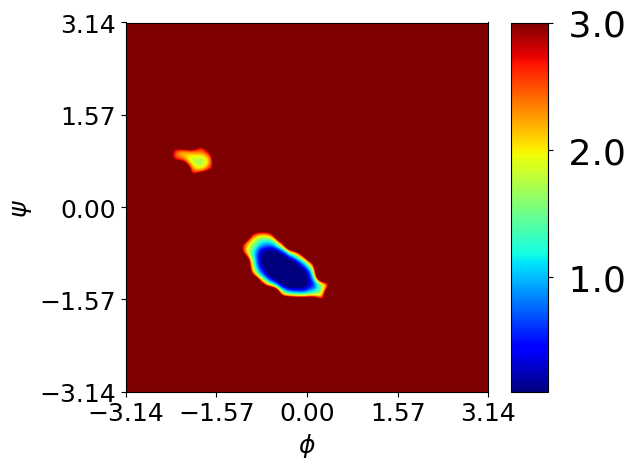

In [41]:

def plot_phipsi_FES(res):
 free_energy,xedges,yedges=np.histogram2d(dihedral_dict['phi'][res],dihedral_dict['psi'][res],36,[[-3.14,3.14],[-3.14,3.14]],density=True,weights=None)
 free_energy=np.log(np.flipud(free_energy)+.000001)
 T=300                                                                                                  
 kbT=T*0.008314/4.184 # kT in kcal/mol
 dG=-(kbT)*free_energy #Convert to kcal/mol
 im=plt.imshow(dG, interpolation='gaussian',extent=[yedges[0], yedges[-1], xedges[0], xedges[-1]],cmap='jet',aspect='auto')
 cbar_ticks=[0,1,2,3]
 cb = plt.colorbar(ticks=cbar_ticks, format=('% .1f'), aspect=10) # grab the Colorbar instance
 imaxes = plt.gca()                                                                                                 
 plt.xticks([-3.14,-3.14/2,0,3.14/2,3.14],fontsize=35)
 plt.yticks([-3.14,-3.14/2,0,3.14/2,3.14],fontsize=35)
 plt.xlabel('$\phi$', size=18)
 plt.ylabel('$\psi$', size=18)
 plt.tick_params(labelsize=18)
 plt.axes(cb.ax)
 plt.clim(vmin=0.1,vmax=3.0)
 plt.yticks(size='26')
 plt.tight_layout()
 plt.show()
 return

plot_phipsi_FES(445)